<h1>
<strong>Project 1</strong>
</h1>
<h2>
Tron Schell
</h2>
<h3>
Part 1: Data Cleaning <br \>
Part 2: Exploratory Data Analysis

</h3>

<h1>
<strong>Part 1: Data Cleaning</strong>
</h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>
Read in the CSV file, set the index to the name of the cars as there is no unique identifier. <br \>
Show the first 5 rows.
<h3>

In [3]:
data = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
data.set_index('Name')
data.head()

Name  \
0                    Opel Ampera-e    
1         Renault Kangoo Maxi ZE 33   
2                      Nissan Leaf    
3  Audi e-tron Sportback 55 quattro   
4            Porsche Taycan Turbo S   

                                    Subtitle Acceleration  TopSpeed   Range  \
0   Battery Electric Vehicle |       58 kWh       7.3 sec  150 km/h  335 km   
1   Battery Electric Vehicle |       31 kWh      22.4 sec  130 km/h  160 km   
2   Battery Electric Vehicle |       36 kWh       7.9 sec  144 km/h  220 km   
3  Battery Electric Vehicle |       86.5 kWh      5.7 sec  200 km/h  375 km   
4  Battery Electric Vehicle |       83.7 kWh      2.8 sec  260 km/h  390 km   

  Efficiency FastChargeSpeed              Drive  NumberofSeats PriceinGermany  \
0  173 Wh/km        210 km/h  Front Wheel Drive              5        €42,990   
1  194 Wh/km               -  Front Wheel Drive              5            NaN   
2  164 Wh/km        230 km/h  Front Wheel Drive              5        €29,990   
3  231 Wh/km        600 km/h    All Wheel Drive              5            NaN   
4  215 Wh/km        860 km/h    All Wheel Drive              4       €186,336   

  PriceinUK  
0       NaN  
1   £31,680  
2   £25,995  
3   £79,900  
4  £138,830

<h3>
We have to rename all of the columns in the dataset because we want to get rid of the units within the columns to make the datatypes usable for graphing.
</h3>

In [4]:
renamed_data = data.rename(columns={'Acceleration':'Acceleration (sec)', 'TopSpeed':'TopSpeed (km/h)', 'Range':'Range (km)', 'Efficiency':'Efficiency (Wh/km)', 'FastChargeSpeed':'FastChargeSpeed (km/h)', 'PriceinGermany':'PriceinGermany (€)', 'PriceinUK':'PriceinUK (£)'})
renamed_data['Acceleration (sec)'] = renamed_data['Acceleration (sec)'].str.replace('sec', '')
renamed_data['TopSpeed (km/h)'] = renamed_data['TopSpeed (km/h)'].str.replace('km/h', '')
renamed_data['Range (km)'] = renamed_data['Range (km)'].str.replace('km', '')
renamed_data['Efficiency (Wh/km)'] = renamed_data['Efficiency (Wh/km)'].str.replace('Wh/km', '')
renamed_data['FastChargeSpeed (km/h)'] = renamed_data['FastChargeSpeed (km/h)'].str.replace('km/h', '')
renamed_data['FastChargeSpeed (km/h)'] = renamed_data['FastChargeSpeed (km/h)'].str.replace('-', 'NaN')
renamed_data['PriceinGermany (€)'] = renamed_data['PriceinGermany (€)'].str.replace('€', '')
renamed_data['PriceinGermany (€)'] = renamed_data['PriceinGermany (€)'].str.replace(',', '')
renamed_data['PriceinUK (£)'] = renamed_data['PriceinUK (£)'].str.replace('£', '')
renamed_data['PriceinUK (£)'] = renamed_data['PriceinUK (£)'].str.replace(',', '')
#renamed_data.iloc[35:48]

<h3>
Drop all of the columns with NULL values, then convert columns into their respective datatypes for use in graphing
</h3>

In [5]:
dropped = renamed_data.dropna()
#dropped.info()
dropped['Acceleration (sec)'] = dropped['Acceleration (sec)'].astype(float)
dropped['TopSpeed (km/h)'] = dropped['TopSpeed (km/h)'].astype(float)
dropped['Range (km)'] = dropped['Range (km)'].astype(float)
dropped['Efficiency (Wh/km)'] = dropped['Efficiency (Wh/km)'].astype(float)
dropped['FastChargeSpeed (km/h)'] = dropped['FastChargeSpeed (km/h)'].astype(float)
dropped['PriceinGermany (€)'] = dropped['PriceinGermany (€)'].astype(float)
dropped['PriceinUK (£)'] = dropped['PriceinUK (£)'].astype(float)

dropped = dropped.dropna()

dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 2 to 174
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    124 non-null    object 
 1   Subtitle                124 non-null    object 
 2   Acceleration (sec)      124 non-null    float64
 3   TopSpeed (km/h)         124 non-null    float64
 4   Range (km)              124 non-null    float64
 5   Efficiency (Wh/km)      124 non-null    float64
 6   FastChargeSpeed (km/h)  124 non-null    float64
 7   Drive                   124 non-null    object 
 8   NumberofSeats           124 non-null    int64  
 9   PriceinGermany (€)      124 non-null    float64
 10  PriceinUK (£)           124 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.6+ KB


/var/folders/6q/112b_g4d25x30bfwwj9_ngrr0000gn/T/ipykernel_13496/3378928555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['Acceleration (sec)'] = dropped['Acceleration (sec)'].astype(float)
/var/folders/6q/112b_g4d25x30bfwwj9_ngrr0000gn/T/ipykernel_13496/3378928555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['TopSpeed (km/h)'] = dropped['TopSpeed (km/h)'].astype(float)
/var/folders/6q/112b_g4d25x30bfwwj9_ngrr0000gn/T/ipykernel_13496/3378928555.py:5: SettingWithCopyWarning: 
A v

<h3>
Visually show if there is any columns that are NULL.
</h3>

<AxesSubplot:>

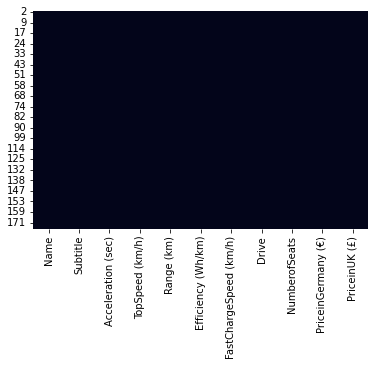

In [6]:
sns.heatmap(dropped.isnull(), cbar=False)

<h2>
<strong>Part 2: Exploratory Data Analysis</strong>
</h2>

<h3>This barchart shows the counts of each type of drive, since we will be coloring every plot using the "Drive" variable, it would be useful to explain that we have an imbalanced dataset and tend to see more All Wheel Drive cars plotted over other types of cars. For machine learning we will have to do some under/oversampling in order to get a balanced dataset to avoid any bais within the model.

<AxesSubplot:xlabel='Drive', ylabel='count'>

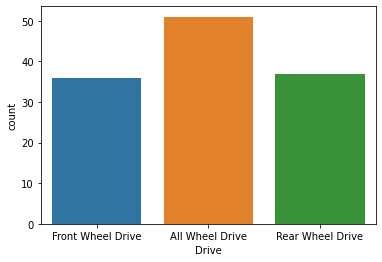

In [13]:
sns.countplot(data=dropped, x='Drive', )

<h3>This chart shows an exponential decrease in price in UK Pounds as Acceleration increases (takes more time to accelerate the vehicle)</h3>

<AxesSubplot:xlabel='Acceleration (sec)', ylabel='PriceinUK (£)'>

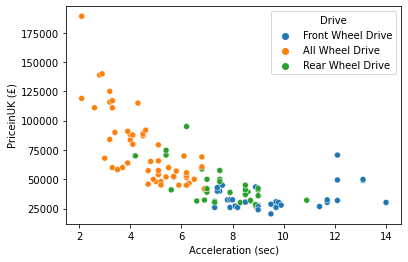

In [ ]:
sns.scatterplot(data=dropped, x='Acceleration (sec)', y='PriceinUK (£)', hue='Drive')

<h3>To see if price action is generally the same between Germany and the UK, we also take a look at the relationship between German Franks and Acceleration as it increases. <br /> <br />As Acceleration increases (takes more time to accelerate the vehicle), the price exponentially decreases.</h3>

<AxesSubplot:xlabel='Acceleration (sec)', ylabel='PriceinGermany (€)'>

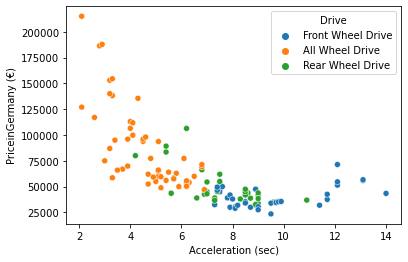

In [ ]:
sns.scatterplot(data=dropped, x='Acceleration (sec)', y ='PriceinGermany (€)', hue='Drive')

<h3>Here we can see that as acceleration increases, range exponentially decreases. <br /> <br />This could be because the cars that have a slower aceleration are generally cheaper and more affordbale card with less features.</h3>

<AxesSubplot:xlabel='Acceleration (sec)', ylabel='Range (km)'>

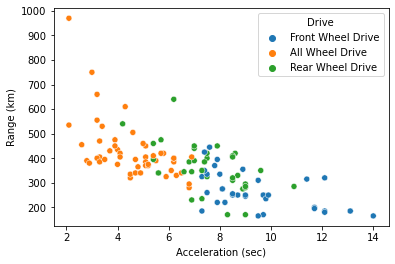

In [ ]:
sns.scatterplot(data=dropped, x='Acceleration (sec)', y='Range (km)', hue='Drive')

<h3> In this bloxplot, we can see that the median price of all drives of a car. In this dataset, we can see that All Wheel Drive vehicles are generally the most expensive as shown by the the median and maximum outlier.

<AxesSubplot:xlabel='Drive', ylabel='PriceinGermany (€)'>

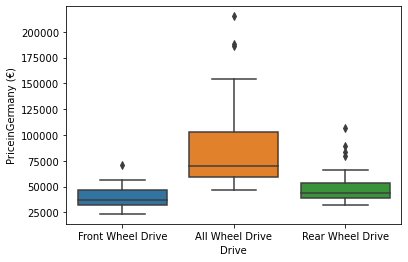

In [ ]:
sns.boxplot(data=dropped, x='Drive', y='PriceinGermany (€)')

This scatterplot shows the general trend between Top Speed and Fast Charge Speed. It has been color coded to show tht generally Front Wheel Drive has the slowest Fast Charge Speed and the slowest Top Speed, while for All Wheel Drive it's the opposite.

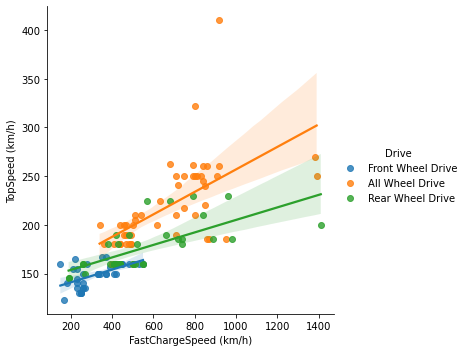

In [ ]:
sns.lmplot(x='FastChargeSpeed (km/h)', y='TopSpeed (km/h)', data=dropped, order=1, hue='Drive')

<h3>
This is a "Correlation Matrix" which allows us to see general trends. Correlation allows us to see if does or doesn't have a linear relationship.
</h3>

<AxesSubplot:>

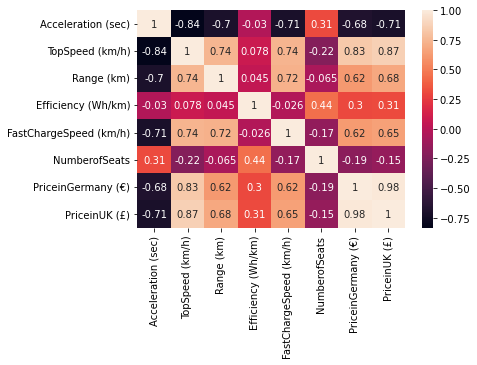

In [ ]:
correlation_matrix = dropped.corr()
dropped.head()

sns.heatmap(correlation_matrix, annot=True)


<h3>
This is called a "Pairplot" or a "Scatter Matrix". It allows us to see all of the scatter plots in relation to everything in the dataset. This gives a good overview of everything inside of the dataset and allows us to make quicker insights into our data as eveything is presented to us.
</h3>

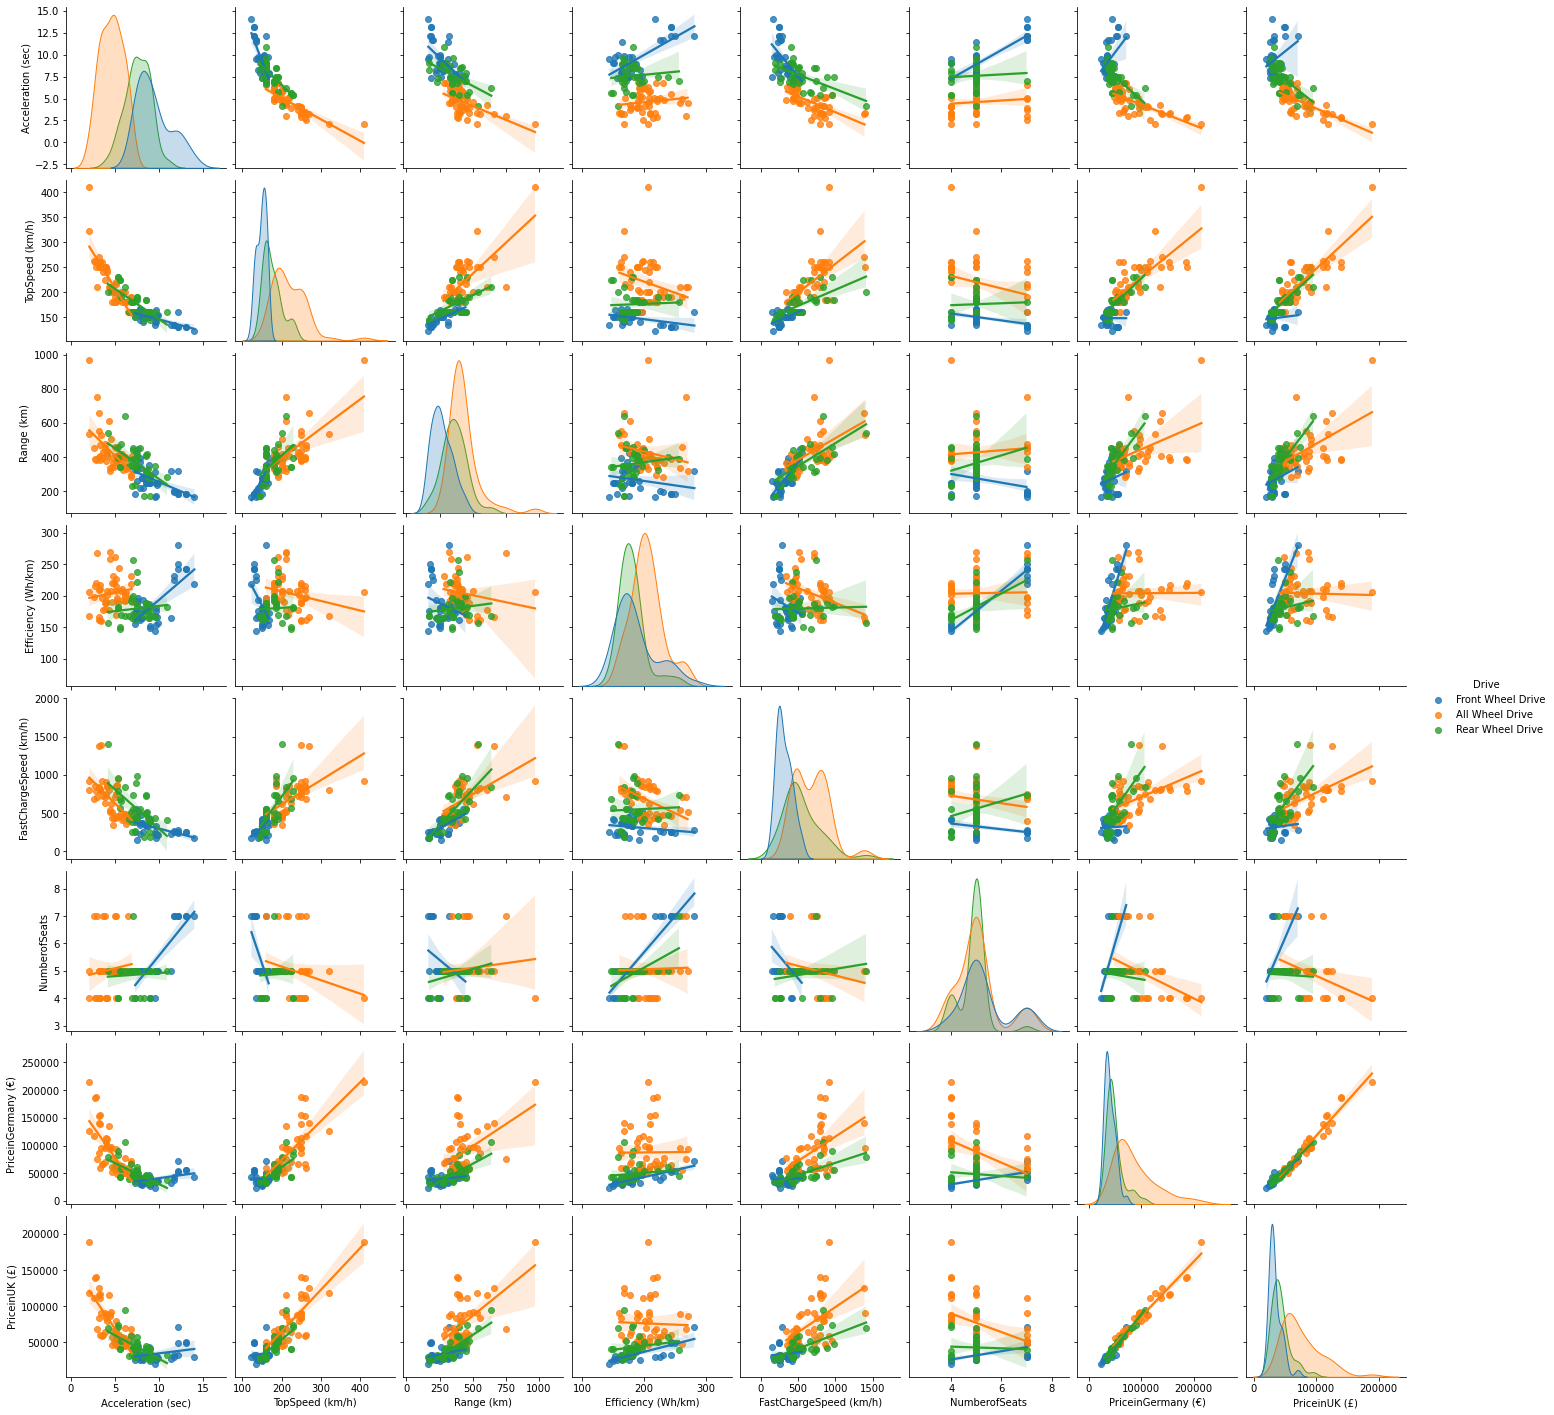

In [ ]:
sns.pairplot(dropped, hue='Drive', kind='reg')

<h2><strong>Results: </strong> <br />
<h3> Really none of these findings are extremely suprising. However, some odd things we found from our plots are things like the fact that the number of seats don't generally affect price as much as something like top speed does. <br /> <br />
Something that was a little bit more interesting too was that we can see that even as Efificiency increases, it doesn't necessarily increase price in any meaningful way.